In [1]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import sklearn
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.metrics import f1_score, recall_score, precision_score, confusion_matrix
import matplotlib.pyplot as plt
import dataframe_image as dfi
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import classification_report

In [2]:
ADSNPs = pd.read_csv('AD SNPs.tsv', sep='\t')
ADSNPs

,riskAllele,pValue,pValueAnnotation,riskFrequency,orValue,beta,ci,mappedGenes,traitName,efoTraits,bgTraits,accessionId,locations,pubmedId,author
0,rs186542490-A,8.000000e-06,(liability model),0.006,-,0.6 unit increase,[0.35-0.85],"MEI4,IRAK1BP1",Late-onset Alzheimer's disease,late-onset Alzheimers disease,-,GCST003815,1310749:58:00,27770636,Mez J
1,rs186076999-T,7.000000e-06,(liability model),0.006,-,0.62 unit increase,[0.35-0.89],"MLLT3,SLC24A2",Late-onset Alzheimer's disease,late-onset Alzheimers disease,-,GCST003815,333568:03:00,27770636,Mez J
2,rs141521929-T,4.000000e-06,(liability model),0.005,-,0.62 unit increase,[0.37-0.87],"TUSC1,RN7SKP120",Late-onset Alzheimer's disease,late-onset Alzheimers disease,-,GCST003815,427838:10:00,27770636,Mez J
3,rs73865608-A,1.000000e-06,(liability model),0.004,-,0.63 unit increase,[0.38-0.88],"LINC02273,RNA5SP169",Late-onset Alzheimer's disease,late-onset Alzheimers disease,-,GCST003815,2534066:20:00,27770636,Mez J
4,rs184614511-T,6.000000e-06,(liability model),0.005,-,0.64 unit increase,[0.37-0.91],KSR2,Late-onset Alzheimer's disease,late-onset Alzheimers disease,-,GCST003815,1964373:16:00,27770636,Mez J
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2587,rs567572378-A,2.000000e-07,-,NR,-,-,-,"KCNH8,EFHB","Alzheimer's disease, proxy Alzheimer's disease...","Alzheimer disease,dementia,family history of A...",-,GCST90267627,326535:53:00,36543923,Sherva R
2588,rs112395375-A,3.000000e-07,-,NR,-,-,-,ZFPM2,"Alzheimer's disease, proxy Alzheimer's disease...","Alzheimer disease,dementia,family history of A...",-,GCST90267627,1744783:41:00,36543923,Sherva R
2589,rs76427927-A,3.000000e-07,-,NR,-,-,-,"TRPS1,CARS1P2","Alzheimer's disease, proxy Alzheimer's disease...","Alzheimer disease,dementia,family history of A...",-,GCST90267627,1918525:38:00,36543923,Sherva R
2590,rs114681435-T,4.000000e-07,-,NR,-,-,-,EGFLAM,"Alzheimer's disease, proxy Alzheimer's disease...","Alzheimer disease,dementia,family history of A...",-,GCST90267627,639362:19:00,36543923,Sherva R


In [3]:
# Remove rows with missing values and retain only minimum p-value scores

ADSNPs = ADSNPs[ADSNPs.mappedGenes != '-']
df = ADSNPs[['riskAllele','pValue','orValue','mappedGenes','traitName','efoTraits']]
idx = df.groupby('riskAllele')['pValue'].idxmin()
foo = df.loc[idx]

foo

,riskAllele,pValue,orValue,mappedGenes,traitName,efoTraits
1825,rs10002506-?,2.000000e-08,-,"HNRNPA1P56,FRAS1",Alzheimer’s disease polygenic risk score (uppe...,"Alzheimer disease,polygenic risk score"
1558,rs10006235-T,4.000000e-07,-,LINC02466,Alzheimer's disease or educational attainment ...,"Alzheimer disease,educational attainment"
2281,rs10008844-A,6.000000e-06,-,"HMGN1P11,RPL21P47",Alzheimer's disease or gastroesophageal reflux...,"Alzheimer disease,gastroesophageal reflux disease"
1581,rs10012882-T,2.000000e-06,-,EPHA5,Alzheimer's disease or educational attainment ...,"Alzheimer disease,educational attainment"
661,rs10018288-G,4.000000e-06,1.16,"LINC00290,LINC02500",Alzheimer's disease in APOE e4+ carriers,Alzheimer disease
...,...,...,...,...,...,...
1484,rs9937469-T,2.000000e-06,2.14,"RPL21P119,LINC02177",Alzheimer's disease with memory domain impairment,"Alzheimer disease,memory impairment"
275,rs9969729-A,2.000000e-06,-,"LINC01505,SLC25A6P5",Alzheimer's disease (late onset),Alzheimer disease
2291,rs9972911-T,6.000000e-06,-,"B4GALNT2,B4GALNT2P1",Alzheimer's disease or gastroesophageal reflux...,"Alzheimer disease,gastroesophageal reflux disease"
2337,rs9983207-A,7.000000e-07,-,DSCAM,Alzheimer's disease or peptic ulcer disease,"Alzheimer disease,peptic ulcer disease"


In [4]:
# Remove all SNP rows with ambiguous SNP calls

bar = foo[~foo['riskAllele'].str.contains('\?')]
len(bar)

1223

In [5]:
# Unique list of genes without cutoff sorted by increasing p-value

genes = bar[bar.pValue < 5e-4].sort_values(by = 'pValue')['mappedGenes'].str.split(',').explode().unique()
AD = pd.DataFrame(genes, columns = ['Approved Gene Symbol'])

AD

,Approved Gene Symbol
0,TOMM40
1,APOE
2,NECTIN2
3,APOC1
4,BCAM
...,...
1295,FKBP8
1296,KCTD15
1297,SUNO1
1298,PRKAR2B


In [6]:
# Get Entrez Gene IDs for AD genes

entrezADgenes = pd.read_csv('new_entrezgenes.txt')
entrezADgenes = entrezADgenes[entrezADgenes['ENTREZID'].notna()].astype({'ENTREZID':int}).drop('Unnamed: 0', axis = 1)

entrezADgenes

,SYMBOL,ENTREZID
0,TOMM40,10452
1,APOE,348
2,NECTIN2,5819
3,APOC1,341
4,BCAM,4059
...,...,...
1295,FKBP8,23770
1296,KCTD15,79047
1297,SUNO1,119863868
1298,PRKAR2B,5577


Gene List from OMIM

In [7]:
# Genemap from OMIM

genemap = pd.read_csv('genemap2.txt', sep='\t')
genemap

,Chromosome,Genomic Position Start,Genomic Position End,Cyto Location,Computed Cyto Location,MIM Number,Gene/Locus And Other Related Symbols,Gene Name,Approved Gene Symbol,Entrez Gene ID,Ensembl Gene ID,Comments,Phenotypes,Mouse Gene Symbol/ID
0,chr1,1,27600000,1p36,NaN,607413,AD7CNTP,Alzheimer disease neuronal thread protein,NaN,NaN,NaN,NaN,NaN,NaN
1,chr1,1,27600000,1p36,NaN,612367,ALPQTL2,"Alkaline phosphatase, plasma level of, QTL 2",NaN,100196914.0,NaN,linkage with rs1780324,"{Alkaline phosphatase, plasma level of, QTL 2}...",NaN
2,chr1,1,123400001,1p,NaN,606788,ANON1,"Anorexia nervosa, susceptibility to, 1",NaN,171514.0,NaN,NaN,"{Anorexia nervosa, susceptibility to, 1}, 6067...",NaN
3,chr1,1,27600000,1p36,NaN,605462,BCC1,"Basal cell carcinoma, susceptibility to, 1",NaN,100307118.0,NaN,associated with rs7538876,"{Basal cell carcinoma, susceptibility to, 1}, ...",NaN
4,chr1,1,27600000,1p36,NaN,606928,BMND3,Bone mineral density QTL 3,NaN,246259.0,NaN,?another locus at 3p21,"[Bone mineral density QTL 3], 606928 (2)",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18404,chrY,25622115,25625511,Yq11.23,Yq11.23,400016,"CDY1, CDY","Chromodomain protein, Y chromosome",CDY1,9085.0,ENSG00000172288,NaN,NaN,NaN
18405,chrY,25728490,25733388,Yq11.23,Yq11.23,400036,TTTY3,"Testis-specific transcript, Y-linked, 3",TTTY3,114760.0,ENSG00000231141,NaN,NaN,NaN
18406,chrY,26600001,57227415,Yq12,NaN,475000,"GCY, TSY, STA","Growth control, Y-chromosome influenced",NaN,2656.0,NaN,NaN,NaN,NaN
18407,chrY,1,57227415,Chr.Y,NaN,400043,DFNY1,"Deafness, Y-linked 1",NaN,724074.0,NaN,NaN,"Deafness, Y-linked 1, 400043 (2), Y-linked",NaN


In [8]:
# Filter out ADgenes

nonAD = genemap[~genemap['Entrez Gene ID'].isin(entrezADgenes['ENTREZID'])]
nonAD

,Chromosome,Genomic Position Start,Genomic Position End,Cyto Location,Computed Cyto Location,MIM Number,Gene/Locus And Other Related Symbols,Gene Name,Approved Gene Symbol,Entrez Gene ID,Ensembl Gene ID,Comments,Phenotypes,Mouse Gene Symbol/ID
0,chr1,1,27600000,1p36,NaN,607413,AD7CNTP,Alzheimer disease neuronal thread protein,NaN,NaN,NaN,NaN,NaN,NaN
1,chr1,1,27600000,1p36,NaN,612367,ALPQTL2,"Alkaline phosphatase, plasma level of, QTL 2",NaN,100196914.0,NaN,linkage with rs1780324,"{Alkaline phosphatase, plasma level of, QTL 2}...",NaN
2,chr1,1,123400001,1p,NaN,606788,ANON1,"Anorexia nervosa, susceptibility to, 1",NaN,171514.0,NaN,NaN,"{Anorexia nervosa, susceptibility to, 1}, 6067...",NaN
3,chr1,1,27600000,1p36,NaN,605462,BCC1,"Basal cell carcinoma, susceptibility to, 1",NaN,100307118.0,NaN,associated with rs7538876,"{Basal cell carcinoma, susceptibility to, 1}, ...",NaN
4,chr1,1,27600000,1p36,NaN,606928,BMND3,Bone mineral density QTL 3,NaN,246259.0,NaN,?another locus at 3p21,"[Bone mineral density QTL 3], 606928 (2)",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18404,chrY,25622115,25625511,Yq11.23,Yq11.23,400016,"CDY1, CDY","Chromodomain protein, Y chromosome",CDY1,9085.0,ENSG00000172288,NaN,NaN,NaN
18405,chrY,25728490,25733388,Yq11.23,Yq11.23,400036,TTTY3,"Testis-specific transcript, Y-linked, 3",TTTY3,114760.0,ENSG00000231141,NaN,NaN,NaN
18406,chrY,26600001,57227415,Yq12,NaN,475000,"GCY, TSY, STA","Growth control, Y-chromosome influenced",NaN,2656.0,NaN,NaN,NaN,NaN
18407,chrY,1,57227415,Chr.Y,NaN,400043,DFNY1,"Deafness, Y-linked 1",NaN,724074.0,NaN,NaN,"Deafness, Y-linked 1, 400043 (2), Y-linked",NaN


In [9]:
# Get genes from nonAD OMIM

# Get n samples
# nonADsample = nonAD[~nonAD['Entrez Gene ID'].isna()].sample(n=353, random_state = 1)[['Approved Gene Symbol', 'Entrez Gene ID']].astype({'Entrez Gene ID':int})

# Get all samples
nonADsample = nonAD[~nonAD['Entrez Gene ID'].isna()][['Approved Gene Symbol', 'Entrez Gene ID']].astype({'Entrez Gene ID':int})
nonADsample = nonADsample[~nonADsample['Approved Gene Symbol'].isna()]
nonADsample

,Approved Gene Symbol,Entrez Gene ID
16,PTPRZ2,5804
18,ZBTB40-IT1,100874345
19,SAMD11,148398
20,NOC2L,26155
21,KLHL17,339451
...,...,...
18401,DAZ3,57054
18402,DAZ4,57135
18403,CSPG4P1Y,114758
18404,CDY1,9085


Training Set

In [10]:
# Create training set of AD genes (AD == 1) and non-AD genes (AD == 0)

train = pd.concat([entrezADgenes, nonADsample.rename(columns={'Approved Gene Symbol':'SYMBOL', 'Entrez Gene ID':'ENTREZID'})],ignore_index=True)
train['AD'] = pd.DataFrame([1]*len(entrezADgenes)+[0]*len(nonADsample))

train

,SYMBOL,ENTREZID,AD
0,TOMM40,10452,1
1,APOE,348,1
2,NECTIN2,5819,1
3,APOC1,341,1
4,BCAM,4059,1
...,...,...,...
17677,DAZ3,57054,0
17678,DAZ4,57135,0
17679,CSPG4P1Y,114758,0
17680,CDY1,9085,0


HumanBase Gene Interaction Scores

In [11]:
humanbase = pd.read_csv('brain_top', sep='\t', names = ['Gene A', 'Gene B', 'Interaction Probability'])
humanbase

,Gene A,Gene B,Interaction Probability
0,1,100008589,0.101838
1,1,100009613,0.100589
2,1,10002,0.103316
3,1,100033414,0.101577
4,1,100037417,0.108858
...,...,...,...
41668859,9989,9991,0.118222
41668860,9989,9993,0.111812
41668861,9989,9997,0.115576
41668862,999,9991,0.198437


In [12]:
hb_pivot = pd.pivot_table(humanbase, values = 'Interaction Probability', index = 'Gene A', columns = 'Gene B', fill_value = 0)
hb_pivot

Gene B,2,9,12,13,14,15,16,18,19,20,...,100507608,100507650,100526664,100526693,100526694,100526737,100526739,100526740,100526760,100526761
Gene A,,,,,,,,,,,,,,,,,,,,,
1,0.101511,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.108205,0.108205,0.0,0.108205,0.108205,0.000000,0.121009,0.000000
2,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
10,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
12,0.113884,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.126680,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100526737,0.000000,0.000000,0.0,0.000000,0.0,0.108205,0.108205,0.000000,0.108205,0.108205,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.108205,0.000000
100526739,0.000000,0.000000,0.0,0.000000,0.0,0.108205,0.000000,0.000000,0.000000,0.108205,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.108205,0.108205,0.000000
100526740,0.000000,0.000000,0.0,0.108205,0.0,0.000000,0.000000,0.000000,0.000000,0.108205,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000


In [13]:
sd_pivot =(hb_pivot-hb_pivot.mean())/hb_pivot.std()
sd_pivot

Gene B,2,9,12,13,14,15,16,18,19,20,...,100507608,100507650,100526664,100526693,100526694,100526737,100526739,100526740,100526760,100526761
Gene A,,,,,,,,,,,,,,,,,,,,,
1,5.759884,-0.281997,-0.14179,-0.131521,-0.125991,-0.164326,-0.164101,-0.184831,-0.175416,-0.223440,...,-0.025739,-0.022515,21.574298,21.098830,-0.025739,17.068287,18.467702,-0.035311,16.049812,-0.033031
2,-0.158332,-0.281997,-0.14179,-0.131521,-0.125991,-0.164326,-0.164101,-0.184831,-0.175416,-0.223440,...,-0.025739,-0.022515,-0.045903,-0.046738,-0.025739,-0.056548,-0.053380,-0.035311,-0.062951,-0.033031
9,-0.158332,-0.281997,-0.14179,-0.131521,-0.125991,-0.164326,-0.164101,-0.184831,-0.175416,-0.223440,...,-0.025739,-0.022515,-0.045903,-0.046738,-0.025739,-0.056548,-0.053380,-0.035311,-0.062951,-0.033031
10,-0.158332,-0.281997,-0.14179,-0.131521,-0.125991,-0.164326,-0.164101,-0.184831,-0.175416,-0.223440,...,-0.025739,-0.022515,-0.045903,-0.046738,-0.025739,-0.056548,-0.053380,-0.035311,-0.062951,-0.033031
12,6.481245,-0.281997,-0.14179,-0.131521,-0.125991,-0.164326,-0.164101,-0.184831,5.604248,-0.223440,...,-0.025739,-0.022515,-0.045903,-0.046738,-0.025739,-0.056548,-0.053380,-0.035311,-0.062951,-0.033031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100526737,-0.158332,-0.281997,-0.14179,-0.131521,-0.125991,5.655378,4.757069,-0.184831,4.761342,3.656479,...,-0.025739,-0.022515,-0.045903,-0.046738,-0.025739,-0.056548,-0.053380,-0.035311,14.344916,-0.033031
100526739,-0.158332,-0.281997,-0.14179,-0.131521,-0.125991,5.655378,-0.164101,-0.184831,-0.175416,3.656479,...,-0.025739,-0.022515,-0.045903,-0.046738,-0.025739,-0.056548,-0.053380,27.863816,14.344916,-0.033031
100526740,-0.158332,-0.281997,-0.14179,8.035281,-0.125991,-0.164326,-0.164101,-0.184831,-0.175416,3.656479,...,-0.025739,-0.022515,-0.045903,-0.046738,-0.025739,-0.056548,-0.053380,-0.035311,-0.062951,-0.033031


In [14]:
# Create sparse matrix of gene interaction scores for training set

ls = list(train['ENTREZID'])
pivot = sd_pivot.loc[sd_pivot.index.isin(ls)]
pivot

Gene B,2,9,12,13,14,15,16,18,19,20,...,100507608,100507650,100526664,100526693,100526694,100526737,100526739,100526740,100526760,100526761
Gene A,,,,,,,,,,,,,,,,,,,,,
1,5.759884,-0.281997,-0.141790,-0.131521,-0.125991,-0.164326,-0.164101,-0.184831,-0.175416,-0.223440,...,-0.025739,-0.022515,21.574298,21.098830,-0.025739,17.068287,18.467702,-0.035311,16.049812,-0.033031
2,-0.158332,-0.281997,-0.141790,-0.131521,-0.125991,-0.164326,-0.164101,-0.184831,-0.175416,-0.223440,...,-0.025739,-0.022515,-0.045903,-0.046738,-0.025739,-0.056548,-0.053380,-0.035311,-0.062951,-0.033031
9,-0.158332,-0.281997,-0.141790,-0.131521,-0.125991,-0.164326,-0.164101,-0.184831,-0.175416,-0.223440,...,-0.025739,-0.022515,-0.045903,-0.046738,-0.025739,-0.056548,-0.053380,-0.035311,-0.062951,-0.033031
10,-0.158332,-0.281997,-0.141790,-0.131521,-0.125991,-0.164326,-0.164101,-0.184831,-0.175416,-0.223440,...,-0.025739,-0.022515,-0.045903,-0.046738,-0.025739,-0.056548,-0.053380,-0.035311,-0.062951,-0.033031
12,6.481245,-0.281997,-0.141790,-0.131521,-0.125991,-0.164326,-0.164101,-0.184831,5.604248,-0.223440,...,-0.025739,-0.022515,-0.045903,-0.046738,-0.025739,-0.056548,-0.053380,-0.035311,-0.062951,-0.033031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100506658,-0.158332,-0.281997,-0.141790,-0.131521,-0.125991,-0.164326,-0.164101,-0.184831,-0.175416,-0.223440,...,-0.025739,-0.022515,-0.045903,-0.046738,-0.025739,-0.056548,-0.053380,-0.035311,-0.062951,-0.033031
100506736,-0.158332,-0.281997,-0.141790,-0.131521,-0.125991,-0.164326,-0.164101,5.045496,-0.175416,-0.223440,...,-0.025739,-0.022515,-0.045903,-0.046738,-0.025739,-0.056548,-0.053380,-0.035311,-0.062951,-0.033031
100506742,-0.158332,-0.281997,-0.141790,-0.131521,-0.125991,-0.164326,-0.164101,5.045496,-0.175416,-0.223440,...,38.551877,-0.022515,-0.045903,-0.046738,38.551877,-0.056548,-0.053380,-0.035311,-0.062951,-0.033031


In [15]:
l = train[train['ENTREZID'].isin(pivot.index)].drop_duplicates().sort_values(by = 'ENTREZID')['AD']
l

15867    0
10810    0
7989     0
7990     0
12282    0
        ..
5736     0
13933    0
1061     1
8410     0
6547     0
Name: AD, Length: 16705, dtype: int64

Class Imbalance

In [16]:
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import EditedNearestNeighbours

import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(pivot, l, test_size=0.20, stratify = l, random_state=26)

In [17]:
smenn = SMOTEENN(sampling_strategy = 0.25,
                 random_state = 26,
                 smote = SMOTE(sampling_strategy = 0.25),
                 enn = EditedNearestNeighbours(sampling_strategy = 'not majority', kind_sel = 'mode'))

X_train_enn, y_train_enn = smenn.fit_resample(X_train, y_train)

In [18]:
sum(y_train_enn)/len(y_train_enn)

0.19951983826130906

## Models

### Bayesian Optimization Package

In [19]:
# !pip install scikit-optimize
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

### Baseline Model

Text(0.5, 1.0, 'Baseline Model Test Predictions')

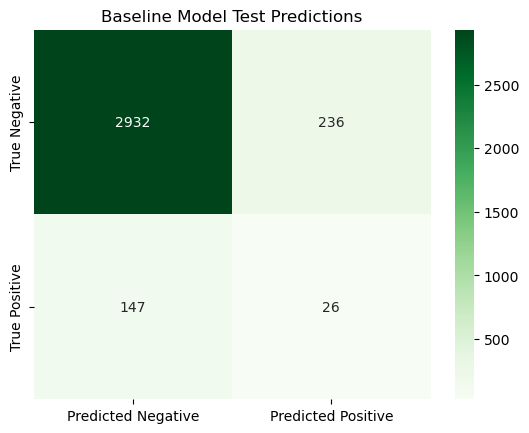

In [20]:
bl_SVC = SVC(kernel = 'linear')
bl_SVC.fit(X_train, y_train)

bl_pred = bl_SVC.predict(X_test)

sns.heatmap(confusion_matrix(y_test, bl_pred),
            fmt='',
            annot=True,
            cmap='Greens',
            xticklabels = ['Predicted Negative', 'Predicted Positive'],
            yticklabels = ['Actual Negative', 'Actual Positive']).set_title('Baseline Model Test Predictions')

In [21]:
print(classification_report(y_test, bl_pred)) 

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      3168
           1       0.10      0.15      0.12       173

    accuracy                           0.89      3341
   macro avg       0.53      0.54      0.53      3341
weighted avg       0.91      0.89      0.90      3341



### Linear SMOTE+ENN

Fitting 1 folds for each of 1 candidates, totalling 1 fits


C:\Users\Harvey\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/1] END ...............C=2.352718564818733;, score=0.666 total time= 3.1min
Fitting 1 folds for each of 1 candidates, totalling 1 fits


C:\Users\Harvey\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/1] END ...........C=0.0012602593949011189;, score=0.748 total time= 3.9min
Fitting 1 folds for each of 1 candidates, totalling 1 fits


C:\Users\Harvey\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/1] END ..............C=2.2095350994035026;, score=0.666 total time= 3.2min
Fitting 1 folds for each of 1 candidates, totalling 1 fits
[CV 1/1] END ............C=5.87540411933884e-05;, score=0.836 total time= 1.0min
Fitting 1 folds for each of 1 candidates, totalling 1 fits
[CV 1/1] END ...........C=0.0006168340492440594;, score=0.776 total time= 3.2min
OrderedDict([('C', 5.87540411933884e-05)])


Text(0.5, 1.0, 'Ridge Bayes-Optimized Model Test Predictions')

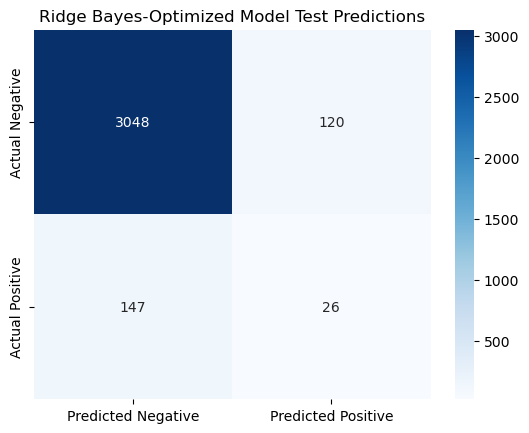

In [22]:
ridgeSVC = svm.LinearSVC()

param_grid = {
    'C': Real(1e-6, 1e+6, prior='log-uniform'),
}

ridge_bayes = BayesSearchCV(
                            ridgeSVC,
                            search_spaces = param_grid,
                            n_iter=5,
                            random_state=0,
                            verbose = 3,
                            scoring = 'precision',
                            cv = ShuffleSplit(test_size=0.20, n_splits=1, random_state=0))
_ = ridge_bayes.fit(X_train_enn, y_train_enn)

ridge_bayes_pred = ridge_bayes.predict(X_test)

print(ridge_bayes.best_params_)

sns.heatmap(confusion_matrix(y_test, ridge_bayes_pred),
            fmt='',
            annot=True,
            cmap='Blues',
            xticklabels = ['Predicted Negative', 'Predicted Positive'],
            yticklabels = ['Actual Negative', 'Actual Positive']).set_title('Ridge Bayes-Optimized Model Test Predictions')

In [24]:
print(classification_report(y_test, ridge_bayes_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      3168
           1       0.18      0.15      0.16       173

    accuracy                           0.92      3341
   macro avg       0.57      0.56      0.56      3341
weighted avg       0.91      0.92      0.92      3341



In [26]:
ridge_bayes.best_params_

OrderedDict([('C', 5.87540411933884e-05)])

---------------------------------------------------------------------------------------------

### LASSO SMOTE+ENN

In [ ]:
lassoSVC = svm.LinearSVC(penalty = 'l1', dual = False, tol = 1e-3, max_iter = 2000)

param_grid = {
    'C': Real(1e-6, 1e+6, prior='log-uniform'),
}

lasso_bayes = BayesSearchCV(
                            lassoSVC,
                            search_spaces = param_grid,
                            n_iter=5,
                            random_state=0,
                            verbose = 3,
                            scoring = 'precision',
                            cv = ShuffleSplit(test_size=0.20, n_splits=1, random_state=0))
_ = lasso_bayes.fit(X_train_enn, y_train_enn)

lasso_bayes_pred = lasso_bayes.predict(X_test)

print(lasso_bayes.best_params_)

sns.heatmap(confusion_matrix(y_test, lasso_bayes_pred),
            fmt='',
            annot=True,
            cmap='BuPu',
            xticklabels = ['Predicted Negative', 'Predicted Positive'],
            yticklabels = ['Actual Negative', 'Actual Positive']).set_title('LASSO Bayes-Optimized Model Test Predictions')

Fitting 1 folds for each of 1 candidates, totalling 1 fits


C:\Users\Harvey\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/1] END ...............C=2.352718564818733;, score=0.679 total time= 8.8min
Fitting 1 folds for each of 1 candidates, totalling 1 fits
[CV 1/1] END ...........C=0.0012602593949011189;, score=1.000 total time=  38.6s
Fitting 1 folds for each of 1 candidates, totalling 1 fits


C:\Users\Harvey\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/1] END ..............C=2.2095350994035026;, score=0.679 total time= 8.0min
Fitting 1 folds for each of 1 candidates, totalling 1 fits


C:\Users\Harvey\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/1] END ............C=5.87540411933884e-05;, score=0.000 total time=  39.5s
Fitting 1 folds for each of 1 candidates, totalling 1 fits


In [ ]:
print(classification_report(y_test, lasso_bayes_pred))

In [ ]:
lasso_bayes.best_params_

### Polynomial Kernel

Fitting 1 folds for each of 1 candidates, totalling 1 fits
[CV 1/1] END ..C=2.352718564818733, kernel=poly;, score=0.822 total time=44.2min
Fitting 1 folds for each of 1 candidates, totalling 1 fits
[CV 1/1] END C=0.0012602593949011189, kernel=poly;, score=0.667 total time=22.1min
Fitting 1 folds for each of 1 candidates, totalling 1 fits
[CV 1/1] END .C=2.2095350994035026, kernel=poly;, score=0.820 total time=42.6min
Fitting 1 folds for each of 1 candidates, totalling 1 fits


C:\Users\Harvey\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/1] END C=5.87540411933884e-05, kernel=poly;, score=0.000 total time=10.4min
Fitting 1 folds for each of 1 candidates, totalling 1 fits


C:\Users\Harvey\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/1] END C=0.0006168340492440594, kernel=poly;, score=0.000 total time=18.5min
OrderedDict([('C', 2.352718564818733), ('kernel', 'poly')])


Text(0.5, 1.0, 'Polynomial Bayes-Optimized Model Test Predictions')

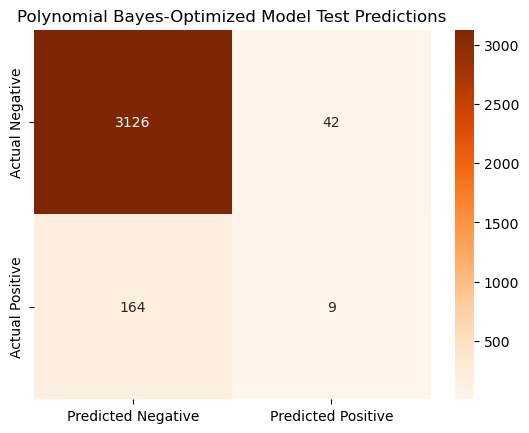

In [20]:
param_grid = {
    'C': Real(1e-6, 1e+6, prior='log-uniform'),
    'kernel':Categorical(['poly'])
}

poly_bayes = BayesSearchCV(
                            SVC(),
                            search_spaces = param_grid,
                            n_iter=5,
                            random_state=0,
                            verbose = 3,
                            scoring = 'precision',
                            cv = ShuffleSplit(test_size=0.20, n_splits=1, random_state=0))
_ = poly_bayes.fit(X_train_enn, y_train_enn)

poly_bayes_pred = poly_bayes.predict(X_test)

print(poly_bayes.best_params_)

sns.heatmap(confusion_matrix(y_test, poly_bayes_pred),
            fmt='',
            annot=True,
            cmap='Oranges',
            xticklabels = ['Predicted Negative', 'Predicted Positive'],
            yticklabels = ['Actual Negative', 'Actual Positive']).set_title('Polynomial Bayes-Optimized Model Test Predictions')

In [21]:
print(classification_report(y_test, poly_bayes_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      3168
           1       0.18      0.05      0.08       173

    accuracy                           0.94      3341
   macro avg       0.56      0.52      0.52      3341
weighted avg       0.91      0.94      0.92      3341



### RBF

Fitting 1 folds for each of 1 candidates, totalling 1 fits
[CV 1/1] END C=2.352718564818733, gamma=0.054020246568608606, kernel=rbf;, score=0.992 total time=98.5min
Fitting 1 folds for each of 1 candidates, totalling 1 fits


C:\Users\Harvey\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/1] END C=0.0012602593949011189, gamma=7.117469405170288, kernel=rbf;, score=0.000 total time=25.2min
Fitting 1 folds for each of 1 candidates, totalling 1 fits
[CV 1/1] END C=2.2095350994035026, gamma=2.5426401812863433e-06, kernel=rbf;, score=1.000 total time=25.7min
Fitting 1 folds for each of 1 candidates, totalling 1 fits


C:\Users\Harvey\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/1] END C=5.87540411933884e-05, gamma=0.3039932179841151, kernel=rbf;, score=0.000 total time=16.4min
Fitting 1 folds for each of 1 candidates, totalling 1 fits


C:\Users\Harvey\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/1] END C=0.0006168340492440594, gamma=5.0506997103847325e-05, kernel=rbf;, score=0.000 total time=15.5min
OrderedDict([('C', 2.2095350994035026), ('gamma', 2.5426401812863433e-06), ('kernel', 'rbf')])


Text(0.5, 1.0, 'RBF Bayes-Optimized Model Test Predictions')

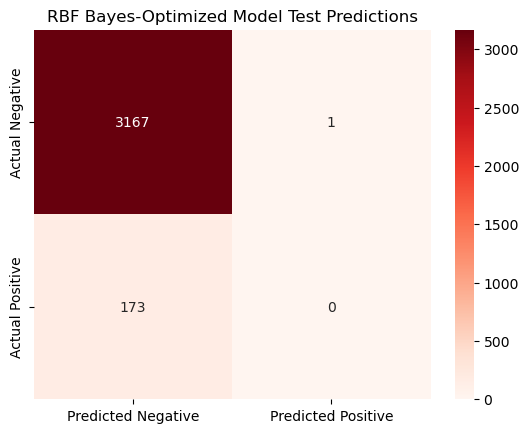

In [20]:
param_grid = {
    'C': Real(1e-6, 1e+6, prior='log-uniform'),
    'gamma': Real(1e-6, 1e+1, prior='log-uniform'),
    'kernel':Categorical(['rbf'])
}

rbf_bayes = BayesSearchCV(
                            SVC(),
                            search_spaces = param_grid,
                            n_iter=5,
                            random_state=0,
                            verbose = 3,
                            scoring = 'precision',
                            cv = ShuffleSplit(test_size=0.20, n_splits=1, random_state=0))
_ = rbf_bayes.fit(X_train_enn, y_train_enn)

rbf_bayes_pred = rbf_bayes.predict(X_test)

print(rbf_bayes.best_params_)

sns.heatmap(confusion_matrix(y_test, rbf_bayes_pred),
            fmt='',
            annot=True,
            cmap='Reds',
            xticklabels = ['Predicted Negative', 'Predicted Positive'],
            yticklabels = ['Actual Negative', 'Actual Positive']).set_title('RBF Bayes-Optimized Model Test Predictions')

In [23]:
print(classification_report(y_test, rbf_bayes_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      3168
           1       0.00      0.00      0.00       173

    accuracy                           0.95      3341
   macro avg       0.47      0.50      0.49      3341
weighted avg       0.90      0.95      0.92      3341



In [ ]:
rbf_SVC = SVC(kernel = 'rbf', C = 2.3527, gamma = 0.0540202)
rbf_SVC.fit(X_train_enn, y_train_enn)

rbf_pred = rbf_SVC.predict(X_test)

sns.heatmap(confusion_matrix(y_test, bl_pred),
            fmt='',
            annot=True,
            cmap='Greens',
            xticklabels = ['Predicted Negative', 'Predicted Positive'],
            yticklabels = ['Actual Negative', 'Actual Positive']).set_title('Baseline Model Test Predictions')

Cluster ADNI gene list

In [ ]:
ADNI_genelist = pd.read_csv('ADNI_genelist.csv', usecols = ['SNPID', 'CHR', 'ENSEMBLEID', 'ENTREZID'])
ADNI_genelist

In [ ]:
# Subset whole HumanBase pivot index on matching genes in ADNI gene list

ADNI = hb_pivot.loc[hb_pivot.index.isin(entrezADNI['ENTREZID'])]
ADNI

In [ ]:
# Subset genes that can be found in HumanBase then concatenate column of AD-association predictions

ADNI_Entrez = ADNI_genelist[ADNI_genelist['ENTREZID'].isin(ADNI.index)]
ADNI_Entrez['AD'] = clf.predict(ADNI)

In [ ]:
ADNI_Entrez

------